In [18]:
import pandas as pd
import numpy as np

# Plotting and correlation
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from scipy.stats import linregress
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

Use monthly demand to predict emissions

**Load data**

In [19]:
# CA hourly CO2 emissions and demand

df = pd.read_csv('data/monthly_all_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

print(f"shape: {df.shape}")
df.head()

shape: (96, 13)


,Unnamed: 0.1,date,demand,emissions,electric,plug-in hybrid electric,fuel cell,diesel,flex fuel,gasoline,gasoline hybrid,natural gas,propane
0,9,202112,11489598.82,4959996.71,522436,305309,10117,590218,1208964,25998612,1298265,8456,93
1,10,202111,10731961.28,4365100.13,509680,301459,9868,599397,1203595,25917176,1286366,8391,160
2,11,202110,12062383.69,4577134.35,496924,297609,9619,608576,1198226,25835740,1274467,8326,227
3,12,202109,13537589.39,5070292.57,484168,293759,9370,617755,1192857,25754304,1262568,8261,294
4,13,202108,15754584.69,5607233.68,471412,289909,9121,626934,1187488,25672868,1250669,8196,361


**Emissions/demand correlation**

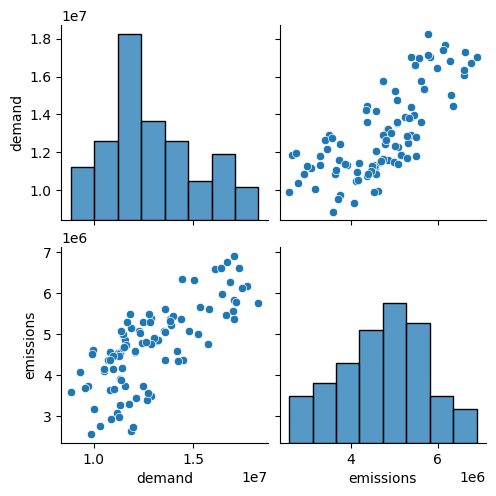

In [20]:
ed = df[['demand','emissions']]

sns.pairplot(ed, kind="scatter")
plt.show()

In [21]:
corrcoef = np.corrcoef(df['demand'], df['emissions'])[0,1]
print(f'Correlation coefficient: {corrcoef}')

p_value = linregress(df['demand'], df['emissions']).pvalue
print(f'p-value: {p_value}')

Correlation coefficient: 0.7392691356865783
p-value: 7.943737354383614e-18


**Model**

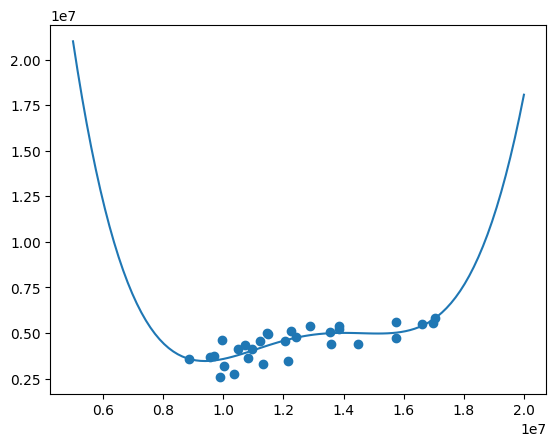

model score on training data : 0.6087631918659322
model score on testing data: 0.3165783939015895


In [22]:
X = df["demand"]
y = df["emissions"]
SPLIT = 30

X_train = X[:SPLIT]
y_train = y[:SPLIT]

X_test = X[SPLIT:]
y_test = y[SPLIT:]

mymodel = np.poly1d(np.polyfit(X_train, y_train, 4))

myline = np.linspace(5000000, 20000000, 100)

plt.scatter(X_train, y_train)
plt.plot(myline, mymodel(myline))
plt.show()

print(f'model score on training data : {r2_score(y_train, mymodel(X_train))}')
print(f'model score on testing data: {r2_score(y_test, mymodel(X_test))}')

**Model**

In [23]:
X = df.drop(columns=["date","emissions"])
y = df["emissions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

distribution = {
        'n_estimators': [5,10,20,30,50,100,200,300,500] ,
        'max_features': ['auto', 'sqrt','log2']
       }

forest = RandomForestRegressor()
random_rf = RandomizedSearchCV(estimator = forest, param_distributions = distribution, n_iter = 10)                
random_rf.fit(X_train,  y_train)

print(f'Training data score: {random_rf.score(X_train,  y_train)}')
print(f'Testing data score: {random_rf.score(X_test, y_test)}')


Training data score: 0.9674657230950088
Testing data score: 0.7477071399912307
